<a href="https://colab.research.google.com/github/Mohd-Ali2/Projects/blob/main/Wine_Quality_Predictintion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraies**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [120]:
df = pd.read_csv('winequality-red.csv')

In [121]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Checking Shape of Dataset**

In [122]:
df.shape

(1599, 12)

# **Checking Missing Values**

In [123]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [124]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# **Visualize the data**

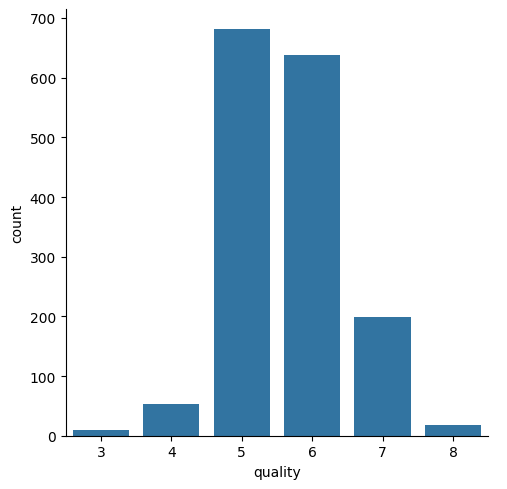

In [125]:
sns.catplot(x='quality', data = df, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

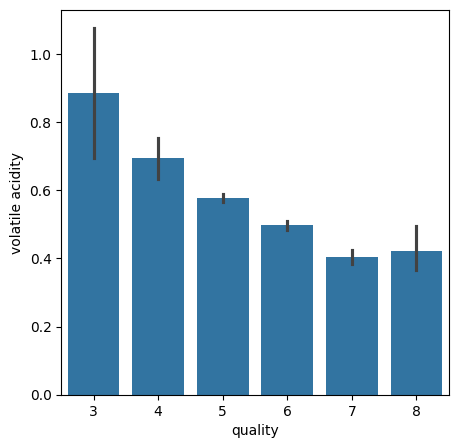

In [126]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

# **Checking the Correlation in Data with quality**

In [127]:
correlation = df.corr()

<Axes: >

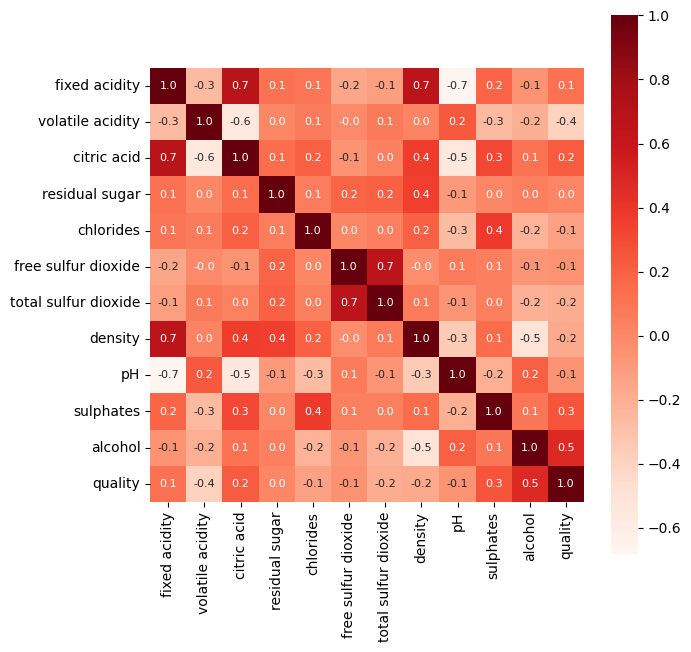

In [128]:
plt.figure(figsize = (7, 7))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Reds')

# **Spretaing data into X and Y**

In [129]:
x = df.drop('quality', axis=1)

In [131]:
y = df['quality'].apply(lambda y: 1 if y >=7 else 0)

# **Spliting Data into Traing and Test Set**

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)

# **Training Data with Random Forest Classifier**

In [165]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

# **Checking the Accuracy of Test Data**

In [166]:
from sklearn.metrics import accuracy_score
x_pred = model.predict(x_test)
test_data = accuracy_score(x_pred, y_test)

In [167]:
print('accuracy:', test_data)

accuracy: 0.934375


# **Predicting Quality with Input Values**

In [168]:
input_data = (7.3,	0.65,	0.0,	1.2,	0.065,	15.0,	21.0,	0.9946,	3.39,	0.47,	10.0)
np_arr = np.asarray(input_data)
reshape = np_arr.reshape(1, -1)
prediction = model.predict(reshape)
print(prediction)
if (prediction[0]==1):
  print('Wine Quality is Good.')
else:
  print('Wine Quality is Not Good.')

[1]
Wine Quality is Good.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
